In [69]:
from egnn_pytorch import EGNN_Network
import torch.nn as nn
import numpy as np
import random
from matplotlib import pyplot as plt

In [423]:
out[1][0].detach().numpy()

array([[  1. , 110. ,   8. ],
       [  1. ,   0.5,   8. ]], dtype=float32)

This network can be used to expanded something that is only having one description for its features. e.g. 1 --to 3. it requires inputs to be ints.

tensor([[[-0.7899, -0.1085,  0.2458],
         [ 0.9132, -1.3523,  0.6202]]], grad_fn=<AddBackward0>)


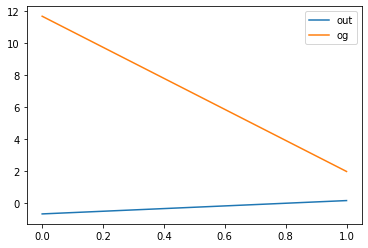

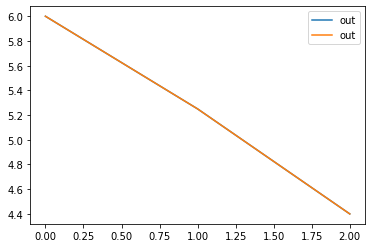

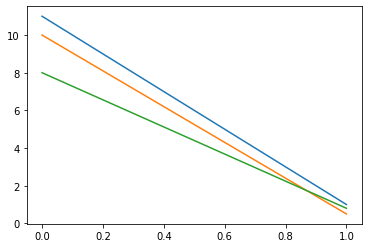

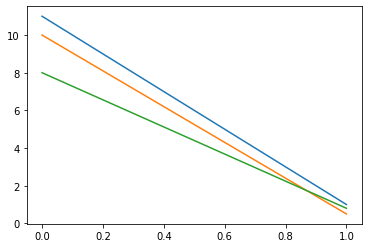

In [467]:
import torch
f=[[11.7],[.1],[-0.3]]
c=tuple([[1,10,8],[-9,1,2.7],[7,-1,1]])
f=[[11.7],[2]]
c=tuple([[11,10,8],[1,.50,.8]])
#f=[[11.7],[13],[-2],[5]]
#c=tuple([[1,110,8],[-1,0,14],[43,6,9],[43,6,9]])
feats = torch.tensor(f).squeeze(1).int()  #!!
coors = torch.tensor(c).float()  # Ensure it is float

out = EGNN_Network(num_positions=10,num_tokens=12,num_nearest_neighbors=1, depth=1, dim=3,num_edge_tokens=2,global_linear_attn_every=1,global_linear_attn_dim_head=3,num_global_tokens=1,adj_dim=2,fourier_features=2,m_dim=1)(feats.unsqueeze(0), coors.unsqueeze(0)) #12 is minumum for 1 node, 15 for two nodes
print(out[0])
plt.plot(np.sum(np.sum(out[0].detach().numpy(),axis=0),axis=1),label="out")
#plt.plot([[11.7],[2.1],[3]])
plt.plot(f,label="og")
plt.legend()


plt.show()
plt.plot(np.mean(c,axis=-2),label="out")
plt.plot(np.mean(out[1][0].detach().numpy(),axis=0),label="out")
plt.legend()
plt.show()
plt.plot(c)
plt.show()
plt.plot(out[1][0].detach().numpy())
plt.show()


In [434]:
import torch
from egnn_pytorch import EGNN

layer1 = EGNN(dim = 5)
layer2 = EGNN(dim = 5)

feats = torch.randn(1, 16, 5)
coors = torch.randn(1, 16, 3)

feats, coors = layer1(feats, coors)
feats, coors = layer2(feats, coors) # (1, 16, 512), (1, 16, 3)

num nearest neighbors = 1 did not change the pos

In [435]:
EGNN(dim = 5)

EGNN(
  (edge_mlp): Sequential(
    (0): Linear(in_features=11, out_features=22, bias=True)
    (1): Identity()
    (2): SiLU()
    (3): Linear(in_features=22, out_features=16, bias=True)
    (4): SiLU()
  )
  (node_norm): Identity()
  (coors_norm): Identity()
  (node_mlp): Sequential(
    (0): Linear(in_features=21, out_features=10, bias=True)
    (1): Identity()
    (2): SiLU()
    (3): Linear(in_features=10, out_features=5, bias=True)
  )
  (coors_mlp): Sequential(
    (0): Linear(in_features=16, out_features=64, bias=True)
    (1): Identity()
    (2): SiLU()
    (3): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [431]:
help(EGNN_Network)

Help on class EGNN_Network in module egnn_pytorch.egnn_pytorch:

class EGNN_Network(torch.nn.modules.module.Module)
 |  Base class for all neural network modules.
 |  
 |  Your models should also subclass this class.
 |  
 |  Modules can also contain other Modules, allowing to nest them in
 |  a tree structure. You can assign the submodules as regular attributes::
 |  
 |      import torch.nn as nn
 |      import torch.nn.functional as F
 |  
 |      class Model(nn.Module):
 |          def __init__(self):
 |              super(Model, self).__init__()
 |              self.conv1 = nn.Conv2d(1, 20, 5)
 |              self.conv2 = nn.Conv2d(20, 20, 5)
 |  
 |          def forward(self, x):
 |              x = F.relu(self.conv1(x))
 |              return F.relu(self.conv2(x))
 |  
 |  Submodules assigned in this way will be registered, and will have their
 |  parameters converted too when you call :meth:`to`, etc.
 |  
 |  :ivar training: Boolean represents whether this module is in trainin

In [421]:
out[1][0].detach().numpy()

array([[  1. , 110. ,   8. ],
       [  1. ,   0.5,   8. ]], dtype=float32)

In [405]:
np.mean(out[1][0].detach().numpy(),axis=0)

array([  1., 110.,   8.], dtype=float32)

do not use "edge dim"!!

array([ 0.6171509 , -0.7620533 , -0.72414994, -0.07537663, -0.58239865,
       -1.586447  ], dtype=float32)

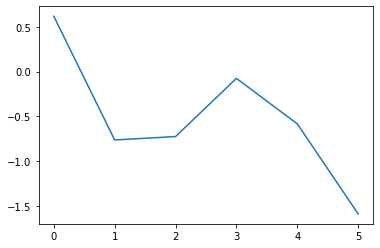

In [258]:
plt.plot(np.sum(np.sum(out[0].detach().numpy(),axis=0),axis=1))
np.sum(np.sum(out[0].detach().numpy(),axis=0),axis=1)

What ive learned: the above code work(ed) to put in floats, but it couldnt handle dimensions greater than 1, things couldnt be multiplied. num tokens fixed dim errors, but then i cant put scalars.

or maye i wouldnt have gotten dim errors if it was for that my input dim size matched my output.

this code allows for floats as inputs, but requires that the feature dimensions equals the output dimensions.

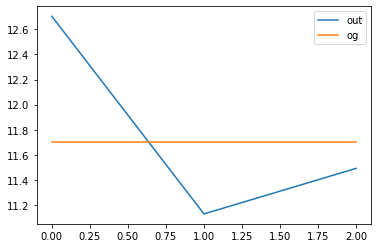

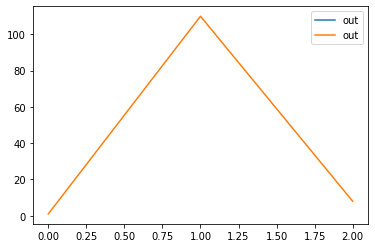

In [290]:
import torch
f=[[11.7,11.7,11.7]]
c=tuple([[1,110,8]])
feats = torch.tensor(f).squeeze(1).float()  # Ensure it is float
coors = torch.tensor(c).float()  # Ensure it is float

out = EGNN_Network(num_positions=3,depth=1, dim=3,num_nearest_neighbors=1)(feats.unsqueeze(0), coors.unsqueeze(0))

plt.plot(np.mean(out[0][0].detach().numpy(),axis=0),label="out")
#plt.plot([[11.7],[2.1],[3]])
plt.plot(np.mean(np.array(f),axis=0),label="og")
plt.legend()

plt.show()
plt.plot(np.mean(np.array(c[0]),axis=0),label="out")
plt.plot(np.mean(out[1][0].detach().numpy(),axis=0),label="out")
plt.legend()

num nearest neighbors cant be smaller than the real number of nodes


In [1]:
help(EGNN_Network)

NameError: name 'EGNN_Network' is not defined

This code can take in a single input feature, however, the dim must equal one such that the dim of what it spits out is the dim that came in (1).

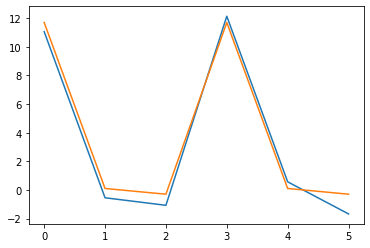

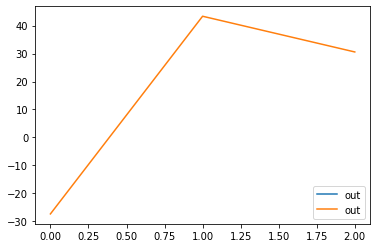

In [235]:
import torch
#f=[[11.7,11.7,11.7],[.1,11.7,11.7],[-0.3,11.7,11.7],[11.7,11.7,11.7],[.1,11.7,11.7],[-0.3,11.7,11.7]]
f=[[11.7],[.1],[-0.3],[11.7],[.1],[-0.3]]
c=tuple([[1,110,8],[-90,1,82.7],[7,19,1],[1,110,8],[-90,1,82.7],[7,19,1]])
feats = torch.tensor(f).float() # Ensure it is float
coors = torch.tensor(c).float()  # Ensure it is float

out = EGNN_Network(num_positions=7,depth=1, dim=1)(feats.unsqueeze(0), coors.unsqueeze(0))

plt.plot(out[0][0].detach().numpy(),label="out")
#plt.plot([[11.7],[2.1],[3]])
plt.plot(f,label="og")

plt.show()
plt.plot(np.mean(np.array(c[0]),axis=0),label="out")
plt.plot(np.mean(out[1][0].detach().numpy(),axis=0),label="out")
plt.legend()

In [74]:
Hs
def loop(nepochs, coors, Hs, ion_labels, model, optimizer, negative_slope):
    """run model1"""
    for epoch in range(nepochs):
        optimizer.zero_grad()
        x, _ = model(Hs.unsqueeze(0), coors.unsqueeze(0)) #can turn off return po
        
        #rep = boltzmax((nn.LeakyReLU(negative_slope=negative_slope)(x)), 15)[0] #apply activation (output raw numbers), and softmax (output nonnormalized probabilities)  
        #print(ion_labels)
        if type(ion_labels) == torch.Tensor: #type(ion_labels) = torch.tensor:
            L = contrastive_loss(x[0], ion_labels)
            L.backward()
            optimizer.step()
        else:
            return x

    return x

#run model 1
pdbs = data.keys()
Ds = {}
for pdb in list(pdbs)[:1]:
    print(pdb)
    ds={}

    d = all_data[pdb]
    pos, hs, ions = d["pos"], d["Hs"], d["ions"]#, d["targets"]
    
    
    for sample in pos.keys():
        
        h=hs[sample]
        L = len(h)
        net, optimizer1 = model1(L, 3, 2, .01, .01) # dim, depth, lr, weight decay #reinit each time lol
        
        coords = torch.tensor(tuple(pos[sample].values()))
        #coords.shape[0]
        #c = np.array([torch.norm(c) for c in coords])
        c = ions.get(sample)
        #print(c)
        #if not c:

            #c = None

        x = loop(50, coords, torch.tensor(h, dtype=int), c, net, optimizer1, 1) #1 epoch
        #y=torch.mean(x, dim=1).unsqueeze(0).detach().numpy()
        #print(np.gradient(np.gradient(np.column_stack(y).flatten()))

        ds[sample] = x
        #ds[sample] = np.gradient(np.gradient(np.column_stack(y).flatten()))
    print(x)
    Ds[pdb] = ds #laplacians

tensor([[1.6383],
        [2.6383],
        [3.5383]], grad_fn=<SelectBackward0>)

In [166]:
H=torch.tensor(f).squeeze(0).float()

In [67]:
torch.tensor([[1.1,0,0],[0,1,0],[0,0,1.12]]).unsqueeze(0).long().dtype

torch.int64